## **PROJECT:03**

**AIM: CAR PRICE PREDICTION USING ML**

**TO: OASIS INFOBYTE**

**FROM: AARYAN LIMBASIYA**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# =======================
# Step 1: Load the Data
# =======================
# Load the dataset from the file
file_path = '/content/drive/MyDrive/car data.csv'  # Change to the correct file path
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe and the column names
print("Dataset Preview:")
print(df.head())
print("\nColumn Names:")
print(df.columns)

# Strip any whitespace from column names
df.columns = df.columns.str.strip()

Dataset Preview:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Column Names:
Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


In [6]:
# =======================
# Step 2: Data Preprocessing
# =======================
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Drop rows with missing values if any
df.dropna(inplace=True)

# Verify the data types and ensure all are correct
print("\nData Types:")
print(df.dtypes)

# Convert 'Year' to datetime format and create a new column 'Car_Age'
df['Car_Age'] = 2024 - df['Year']  # Assuming the current year is 2024
df.drop(columns=['Year'], inplace=True)

# Convert categorical columns to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)



Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Data Types:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


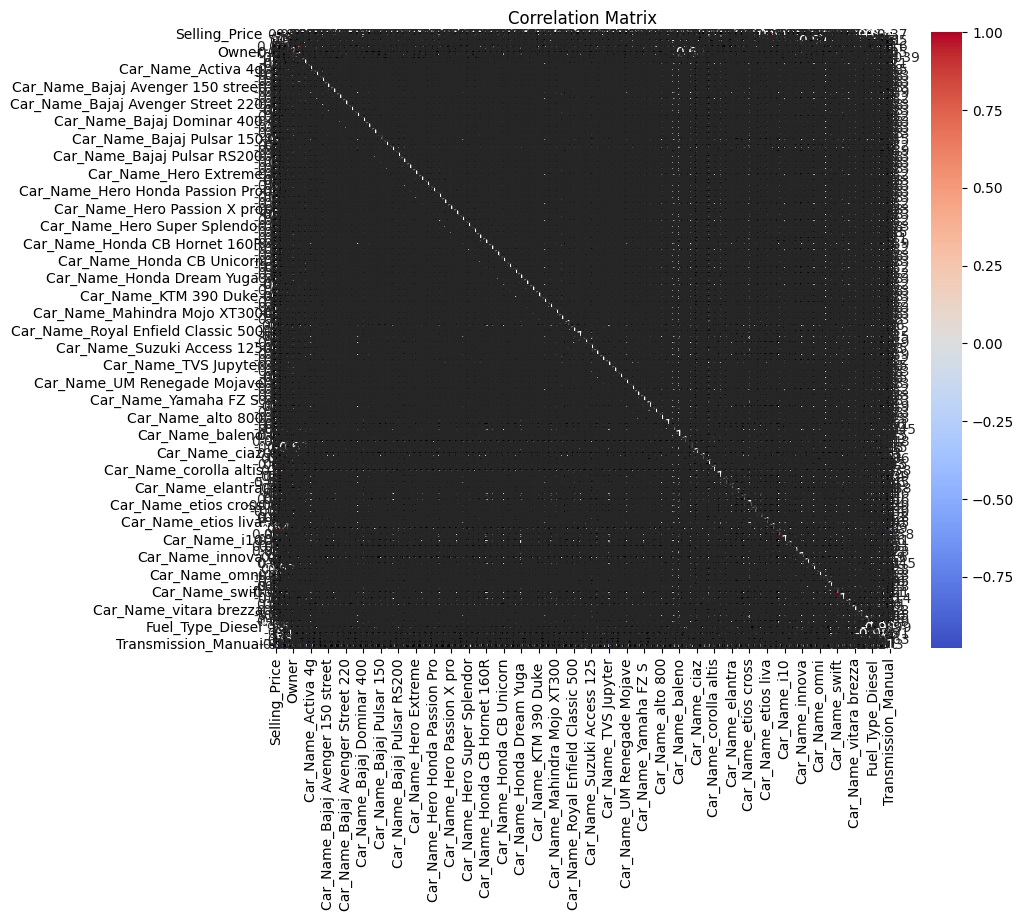

In [7]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1, linecolor='k')
plt.title('Correlation Matrix')
plt.show()

In [8]:
# =======================
# Step 4: Feature Selection and Data Splitting
# =======================
# Features and target variable
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# =======================
# Step 5: Data Standardization
# =======================
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# =======================
# Step 6: Model Training
# =======================
# Training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 3615626376649221695602688.00
R^2 Score: -156958308284493457260544.00


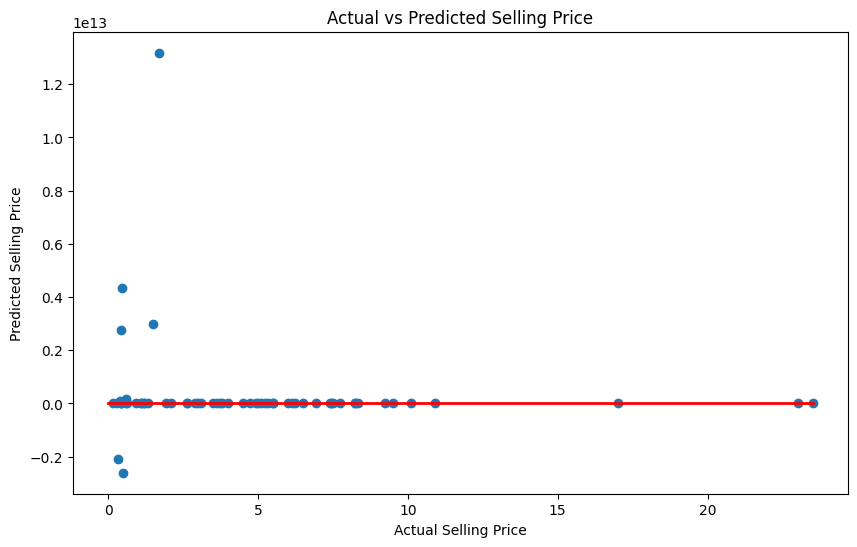

In [11]:
# =======================
# Step 7: Model Evaluation
# =======================
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Plotting actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()